##  Step 1: Data Loading and Initial Overview

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [96]:
df_main = pd.read_csv("Dataset/Telco-Customer-Churn.csv")
df_demo = pd.read_csv("Dataset/Telco_customer_churn_demographics.csv")
df_loc = pd.read_csv("Dataset/Telco_customer_churn_location.csv")
df_pop = pd.read_csv("Dataset/Telco_customer_churn_population.csv")
df_service = pd.read_csv("Dataset/Telco_customer_churn_services.csv")
df_churn_stat = pd.read_csv("Dataset/Telco_customer_churn_status.csv")

##  Step 2: Data Merging

In [97]:

df_main.columns = df_main.columns.str.strip().str.title().str.replace(" ", "")
df_demo.columns = df_demo.columns.str.strip().str.replace(" ", "").str.title()
df_loc.columns = df_loc.columns.str.strip().str.replace(" ", "").str.title()
df_service.columns = df_service.columns.str.strip().str.replace(" ", "").str.title()
df_churn_stat.columns = df_churn_stat.columns.str.strip().str.replace(" ", "").str.title()
df_pop.columns = df_pop.columns.str.strip().str.replace(" ", "").str.title()


# Merge datasets on Customerid
df_merged = pd.merge(df_main, df_demo, on="Customerid", how="left")
df_merged = pd.merge(df_merged, df_loc, on="Customerid", how="left")
df_merged = pd.merge(df_merged, df_service ,on="Customerid", how="left")
df_merged = pd.merge(df_merged, df_churn_stat,on="Customerid", how="left")

# Merge with population data on Zipcode
df_merged = pd.merge(df_merged, df_pop,on="Zipcode", how="left")



# Exploratory Data Analysis (EDA)

In [98]:
df_merged.shape

(7043, 81)

In [99]:
df_merged.head()

,Customerid,Gender_x,Seniorcitizen_x,Partner,Dependents_x,Tenure,Phoneservice_x,Multiplelines_x,Internetservice_x,Onlinesecurity_x,...,Satisfactionscore,Customerstatus,Churnlabel,Churnvalue,Churnscore,Cltv,Churncategory,Churnreason,Id,Population
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,3,Joined,No,0,27,3964,NaN,NaN,1,"54,492"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,3,Stayed,No,0,61,3441,NaN,NaN,2,"44,586"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer,3,"58,198"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,3,Stayed,No,0,66,4307,NaN,NaN,4,"67,852"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,2,Churned,Yes,1,67,2701,Other,Moved,5,"43,019"


In [100]:
df_merged.columns

Index(['Customerid', 'Gender_x', 'Seniorcitizen_x', 'Partner', 'Dependents_x',
       'Tenure', 'Phoneservice_x', 'Multiplelines_x', 'Internetservice_x',
       'Onlinesecurity_x', 'Onlinebackup_x', 'Deviceprotection', 'Techsupport',
       'Streamingtv_x', 'Streamingmovies_x', 'Contract_x',
       'Paperlessbilling_x', 'Paymentmethod_x', 'Monthlycharges',
       'Totalcharges_x', 'Churn', 'Count_x', 'Gender_y', 'Age', 'Under30',
       'Seniorcitizen_y', 'Married', 'Dependents_y', 'Numberofdependents',
       'Locationid', 'Count_y', 'Country', 'State', 'City', 'Zipcode',
       'Latlong', 'Latitude', 'Longitude', 'Serviceid', 'Count_x', 'Quarter_x',
       'Referredafriend', 'Numberofreferrals', 'Tenureinmonths', 'Offer',
       'Phoneservice_y', 'Avgmonthlylongdistancecharges', 'Multiplelines_y',
       'Internetservice_y', 'Internettype', 'Avgmonthlygbdownload',
       'Onlinesecurity_y', 'Onlinebackup_y', 'Deviceprotectionplan',
       'Premiumtechsupport', 'Streamingtv_y', 'Strea

In [101]:

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customerid                     7043 non-null   object 
 1   Gender_x                       7043 non-null   object 
 2   Seniorcitizen_x                7043 non-null   int64  
 3   Partner                        7043 non-null   object 
 4   Dependents_x                   7043 non-null   object 
 5   Tenure                         7043 non-null   int64  
 6   Phoneservice_x                 7043 non-null   object 
 7   Multiplelines_x                7043 non-null   object 
 8   Internetservice_x              7043 non-null   object 
 9   Onlinesecurity_x               7043 non-null   object 
 10  Onlinebackup_x                 7043 non-null   object 
 11  Deviceprotection               7043 non-null   object 
 12  Techsupport                    7043 non-null   o

In [102]:
df_merged.describe()

,Seniorcitizen_x,Tenure,Monthlycharges,Count_x,Age,Numberofdependents,Count_y,Zipcode,Latitude,Longitude,...,Totalrefunds,Totalextradatacharges,Totallongdistancecharges,Totalrevenue,Count_y,Satisfactionscore,Churnvalue,Churnscore,Cltv,Id
count,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,1.0,46.509726,0.468692,1.0,93486.071134,36.197455,-119.756684,...,1.962182,6.860713,749.099262,3034.379056,1.0,3.244924,0.265370,58.505040,4400.295755,784.801221
std,0.368612,24.559481,30.090047,0.0,16.750352,0.962802,0.0,1856.768045,2.468929,2.154425,...,7.902614,25.104978,846.660055,2865.204542,0.0,1.201657,0.441561,21.170031,1183.057152,489.044508
min,0.000000,0.000000,18.250000,1.0,19.000000,0.000000,1.0,90001.000000,32.555828,-124.301372,...,0.000000,0.000000,0.000000,21.360000,1.0,1.000000,0.000000,5.000000,2003.000000,1.000000
25%,0.000000,9.000000,35.500000,1.0,32.000000,0.000000,1.0,92101.000000,33.990646,-121.788090,...,0.000000,0.000000,70.545000,605.610000,1.0,3.000000,0.000000,40.000000,3469.000000,353.000000
50%,0.000000,29.000000,70.350000,1.0,46.000000,0.000000,1.0,93518.000000,36.205465,-119.595293,...,0.000000,0.000000,401.440000,2108.640000,1.0,3.000000,0.000000,61.000000,4527.000000,759.000000
75%,0.000000,55.000000,89.850000,1.0,60.000000,0.000000,1.0,95329.000000,38.161321,-117.969795,...,0.000000,0.000000,1191.100000,4801.145000,1.0,4.000000,1.000000,75.500000,5380.500000,1208.000000
max,1.000000,72.000000,118.750000,1.0,80.000000,9.000000,1.0,96150.000000,41.962127,-114.192901,...,49.790000,150.000000,3564.720000,11979.340000,1.0,5.000000,1.000000,96.000000,6500.000000,1670.000000


# 4: Data Cleaning & Feature Engineering

In [103]:
# Rename columns with suffix '_y' and  suffix '_x' by removing the suffixes
df_merged.columns = df_merged.columns.str.replace('_x', '', regex=False).str.replace('_y', '', regex=False)

df_merged.columns

Index(['Customerid', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Churn', 'Count',
       'Gender', 'Age', 'Under30', 'Seniorcitizen', 'Married', 'Dependents',
       'Numberofdependents', 'Locationid', 'Count', 'Country', 'State', 'City',
       'Zipcode', 'Latlong', 'Latitude', 'Longitude', 'Serviceid', 'Count',
       'Quarter', 'Referredafriend', 'Numberofreferrals', 'Tenureinmonths',
       'Offer', 'Phoneservice', 'Avgmonthlylongdistancecharges',
       'Multiplelines', 'Internetservice', 'Internettype',
       'Avgmonthlygbdownload', 'Onlinesecurity', 'Onlinebackup',
       'Deviceprotectionplan', 'Premiumtechsupport', 'Streamingtv',
       'Streamingmovies', 'Streamingmusic', 'Unlimiteddata', 'Contr

In [104]:
null_columns = df_merged.columns[df_merged.isnull().sum() > 0].tolist()

df_merged[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Churncategory  1869 non-null   object
 1   Churnreason    1869 non-null   object
dtypes: object(2)
memory usage: 165.1+ KB


In [105]:
from difflib import get_close_matches

cols = df_merged.columns.tolist()
checked = []

for col in cols:
    if col not in [item for sublist in checked for item in sublist]:  
        matches = get_close_matches(col, cols, n=5, cutoff=0.85)
        if len(matches) > 1:
            checked.append(matches)


cols_with_same_name = []

for group in checked:
    cols_with_same_name.append(group[0])  
    

print("Columns to drop:", cols_with_same_name)



Columns to drop: ['Gender', 'Seniorcitizen', 'Dependents', 'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Count', 'Quarter']


In [106]:
cols_with_same_value = df_merged.columns[df_merged.nunique() == df_merged.shape[0]].to_list()

cols_with_same_value

['Customerid', 'Locationid', 'Serviceid', 'Statusid']

In [107]:
cols_not_needed = ['Latlong', 'Customerid', 'Locationid', 'Id', 
    'Serviceid', 'Statusid','City', 'Zipcode', 
    'Latitude', 'Longitude' , 'Quarter' , 'Tenureinmonths' ,'Country', 'State', 'Population']

In [108]:
leakage_cols = [
    'Churnlabel', 'Churnvalue', 'Churnscore', 'Cltv',
    'Churncategory', 'Churnreason', 'Customerstatus', 'Statusid', 'Id',
    'Totalrevenue', 'Totalrefunds', 'Totallongdistancecharges',
    'Totalextradatacharges'
]


In [109]:


cols_to_drop = leakage_cols + cols_with_same_value + cols_not_needed + cols_with_same_name + null_columns

print('Cols To Drop is Equal to  ' , len(cols_to_drop) )


Cols To Drop is Equal to   52


In [110]:
print('All Data Cols Before  Drop is Equal to  ' , len(df_merged.columns) )

All Data Cols Before  Drop is Equal to   81


In [111]:
df_merged.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print('All Data Cols After  Drop is Equal to  ' , len(df_merged.columns) )
print(df_merged.columns.tolist())


All Data Cols After  Drop is Equal to   20
['Partner', 'Tenure', 'Techsupport', 'Churn', 'Age', 'Under30', 'Married', 'Numberofdependents', 'Referredafriend', 'Numberofreferrals', 'Offer', 'Avgmonthlylongdistancecharges', 'Internettype', 'Avgmonthlygbdownload', 'Deviceprotectionplan', 'Premiumtechsupport', 'Streamingmusic', 'Unlimiteddata', 'Monthlycharge', 'Satisfactionscore']


In [112]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Partner                        7043 non-null   object 
 1   Tenure                         7043 non-null   int64  
 2   Techsupport                    7043 non-null   object 
 3   Churn                          7043 non-null   object 
 4   Age                            7043 non-null   int64  
 5   Under30                        7043 non-null   object 
 6   Married                        7043 non-null   object 
 7   Numberofdependents             7043 non-null   int64  
 8   Referredafriend                7043 non-null   object 
 9   Numberofreferrals              7043 non-null   int64  
 10  Offer                          7043 non-null   object 
 11  Avgmonthlylongdistancecharges  7043 non-null   float64
 12  Internettype                   7043 non-null   o

In [113]:
df_merged.dtypes.value_counts()

object     12
int64       6
float64     2
dtype: int64

In [114]:
categorical = df_merged.select_dtypes(include='object').columns.to_list()

print("Categorical columns are ", len(categorical)  , categorical)

Categorical columns are  12 ['Partner', 'Techsupport', 'Churn', 'Under30', 'Married', 'Referredafriend', 'Offer', 'Internettype', 'Deviceprotectionplan', 'Premiumtechsupport', 'Streamingmusic', 'Unlimiteddata']


In [115]:
df_merged[categorical]

,Partner,Techsupport,Churn,Under30,Married,Referredafriend,Offer,Internettype,Deviceprotectionplan,Premiumtechsupport,Streamingmusic,Unlimiteddata
0,Yes,No,No,No,Yes,No,Offer E,DSL,No,No,No,Yes
1,No,No,No,No,No,No,None,DSL,Yes,No,No,Yes
2,No,No,Yes,No,No,No,None,DSL,No,No,No,Yes
3,No,Yes,No,No,No,No,None,DSL,Yes,Yes,No,Yes
4,No,No,Yes,Yes,No,No,None,Fiber Optic,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,No,No,Yes,Yes,Offer C,Cable,Yes,Yes,Yes,Yes
7039,Yes,No,No,No,Yes,Yes,None,Fiber Optic,Yes,No,Yes,Yes
7040,Yes,No,No,No,Yes,Yes,None,DSL,No,No,No,Yes
7041,Yes,No,Yes,No,Yes,No,None,Fiber Optic,No,No,No,No


In [116]:
non_binary_categorical = ['Offer','Internettype']
df_merged[non_binary_categorical]

,Offer,Internettype
0,Offer E,DSL
1,None,DSL
2,None,DSL
3,None,DSL
4,None,Fiber Optic
...,...,...
7038,Offer C,Cable
7039,None,Fiber Optic
7040,None,DSL
7041,None,Fiber Optic


In [117]:
dummies = pd.get_dummies(df_merged[non_binary_categorical], drop_first=True, dtype=float)
df_merged.drop(columns=non_binary_categorical, inplace=True)
df_merged = pd.concat([df_merged, dummies], axis=1)


In [118]:
categorical = df_merged.select_dtypes(include='object').columns.to_list()

print("Categorical columns are ", len(categorical)  , categorical)

Categorical columns are  10 ['Partner', 'Techsupport', 'Churn', 'Under30', 'Married', 'Referredafriend', 'Deviceprotectionplan', 'Premiumtechsupport', 'Streamingmusic', 'Unlimiteddata']


In [119]:
df_merged[categorical].nunique()

Partner                 2
Techsupport             3
Churn                   2
Under30                 2
Married                 2
Referredafriend         2
Deviceprotectionplan    2
Premiumtechsupport      2
Streamingmusic          2
Unlimiteddata           2
dtype: int64

In [120]:
df_merged['Techsupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Techsupport, dtype: int64

In [121]:
df_merged[categorical] = df_merged[categorical].apply(lambda col: col.map({'Yes': 1, 'No': 0 , "No internet service":0}))


In [122]:
df_merged.dtypes.value_counts()

int64      16
float64    10
dtype: int64

In [123]:
df_merged.head()

,Partner,Tenure,Techsupport,Churn,Age,Under30,Married,Numberofdependents,Referredafriend,Numberofreferrals,...,Monthlycharge,Satisfactionscore,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internettype_DSL,Internettype_Fiber Optic,Internettype_None
0,1,1,0,0,36,0,1,0,0,0,...,29.85,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,34,0,0,46,0,0,0,0,0,...,56.95,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,2,0,1,37,0,0,0,0,0,...,53.85,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,45,1,0,53,0,0,0,0,0,...,42.30,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2,0,1,19,1,0,2,0,0,...,70.70,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
df_merged.describe()

,Partner,Tenure,Techsupport,Churn,Age,Under30,Married,Numberofdependents,Referredafriend,Numberofreferrals,...,Monthlycharge,Satisfactionscore,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internettype_DSL,Internettype_Fiber Optic,Internettype_None
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.483033,32.371149,0.290217,0.265370,46.509726,0.198921,0.483033,0.468692,0.457476,1.951867,...,64.761692,3.244924,0.073832,0.116996,0.058924,0.085475,0.114298,0.234559,0.430924,0.216669
std,0.499748,24.559481,0.453895,0.441561,16.750352,0.399217,0.499748,0.962802,0.498224,3.001199,...,30.090047,1.201657,0.261516,0.321438,0.235499,0.279607,0.318195,0.423753,0.495241,0.412004
min,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,1.000000,1.000000,60.000000,0.000000,1.000000,0.000000,1.000000,3.000000,...,89.850000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,1.000000,1.000000,80.000000,1.000000,1.000000,9.000000,1.000000,11.000000,...,118.750000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
results = []
cols=[]
for col in df_merged:
    desc = df_merged[col].describe()
    Q1 = desc['25%']    
    Q3 = desc['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (3 * IQR)
    min_val = desc['min']
    max_val = desc['max']
    if min_val == 0 and max_val == 1 :
            continue
    has_outliers = df_merged[(df_merged[col] < lower_bound) | (df_merged[col] > upper_bound)]
    outlier_count = has_outliers.shape[0]
    
    
    if outlier_count:
        cols.append(col)
        results.append( {
            'Column': col,
            'Outlier Count': outlier_count,
            'Outliers percentage' : round(outlier_count /  df_merged[col].shape[0] * 100 , 2) 
        })


print(len(results) , results )


1 [{'Column': 'Numberofdependents', 'Outlier Count': 1627, 'Outliers percentage': 23.1}]


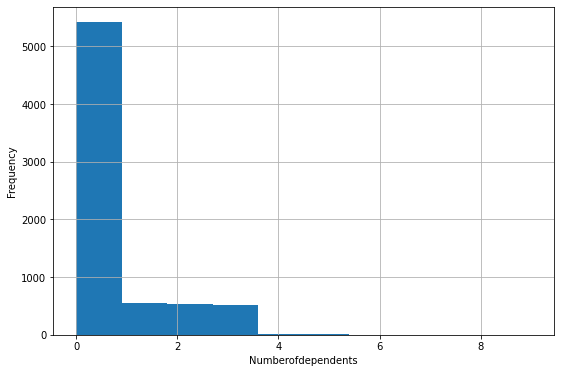

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
i = 1
for col in df_merged[cols]:
    plt.subplot(2, 2, i)
    ax = df_merged[col].hist(bins=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    i += 1
    if i > 4:  
        break

plt.tight_layout()
plt.show()


In [127]:
df_merged[cols].describe()

,Numberofdependents
count,7043.000000
mean,0.468692
std,0.962802
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


In [128]:
df_merged['Numberofdependents'].value_counts()

0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: Numberofdependents, dtype: int64

In [129]:
df_merged['Numberofdependents'] = (df_merged['Numberofdependents'] > 0).astype(int)


In [130]:
df_merged['Numberofdependents'].value_counts()

0    5416
1    1627
Name: Numberofdependents, dtype: int64

In [131]:
df_merged.describe()

,Partner,Tenure,Techsupport,Churn,Age,Under30,Married,Numberofdependents,Referredafriend,Numberofreferrals,...,Monthlycharge,Satisfactionscore,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internettype_DSL,Internettype_Fiber Optic,Internettype_None
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.483033,32.371149,0.290217,0.265370,46.509726,0.198921,0.483033,0.231010,0.457476,1.951867,...,64.761692,3.244924,0.073832,0.116996,0.058924,0.085475,0.114298,0.234559,0.430924,0.216669
std,0.499748,24.559481,0.453895,0.441561,16.750352,0.399217,0.499748,0.421508,0.498224,3.001199,...,30.090047,1.201657,0.261516,0.321438,0.235499,0.279607,0.318195,0.423753,0.495241,0.412004
min,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,1.000000,1.000000,60.000000,0.000000,1.000000,0.000000,1.000000,3.000000,...,89.850000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,11.000000,...,118.750000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
df_merged['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Split to Train/Test


In [133]:
from sklearn.model_selection import train_test_split


x = df_merged.drop('Churn', axis=1)   
y = df_merged['Churn']                

x_train , x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2, random_state=42, stratify=y)

print("x_train shape:", x_train.shape ,", y_train shape :" , y_train.shape )
print("x_test shape:", x_test.shape , ", x_train shape :" , y_test.shape)        


x_train shape: (5634, 25) , y_train shape : (5634,)
x_test shape: (1409, 25) , x_train shape : (1409,)


# Scaling & sampling & choosing Best model 

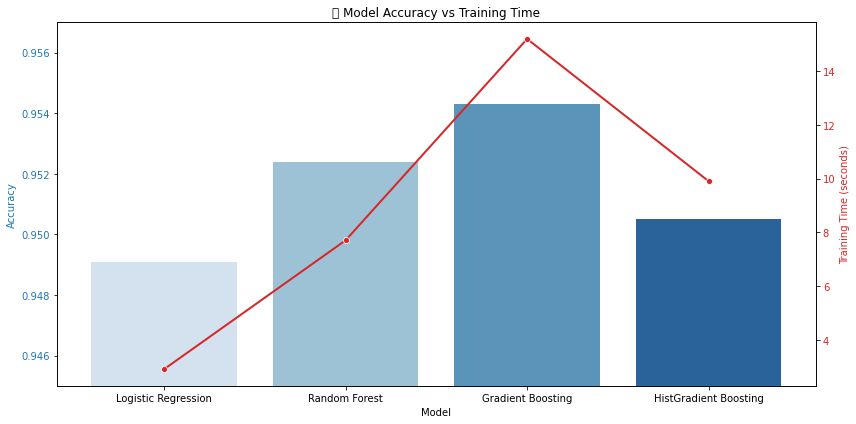

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns


models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'HistGradient Boosting']
accuracies = [0.9491, 0.9524, 0.9543, 0.9505]
times = [2.9, 7.7, 15.2, 9.9]

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
sns.barplot(x=models, y=accuracies, ax=ax1, palette='Blues')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.945, 0.957)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color)
sns.lineplot(x=models, y=times, ax=ax2, color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('🔍 Model Accuracy vs Training Time')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 


pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),         
    ('scaler', MinMaxScaler()),               
    ('model', RandomForestClassifier())
])


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, x_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", scores.tolist())
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.9450354609929078, 0.9574468085106383, 0.9521276595744681, 0.9556737588652482, 0.9591474245115453, 0.9431616341030196, 0.9609236234458259, 0.9644760213143873, 0.9449378330373002, 0.9484902309058615]
Mean accuracy: 0.9531420455261201


In [136]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier())])

In [137]:
y_pred = pipeline.predict(x_test)

# Evaluate Model 

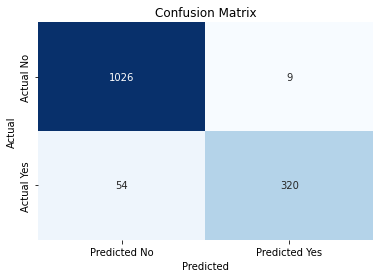

In [138]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


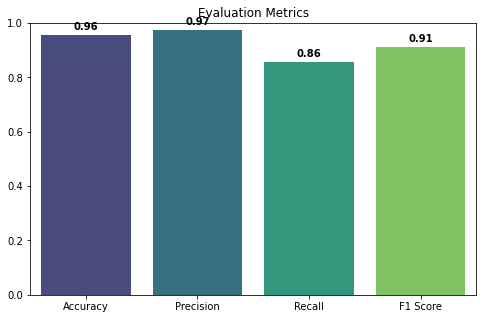

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8,5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [140]:
4+2

6

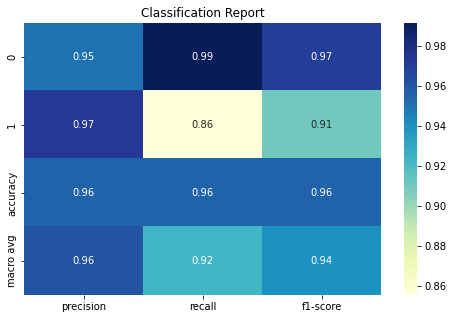

In [141]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()


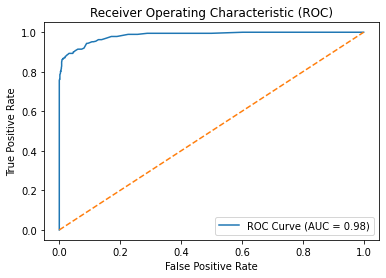

In [142]:
from sklearn.metrics import roc_curve, auc

y_proba = pipeline.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


# Save Model

In [143]:
import joblib 

joblib.dump(pipeline, 'churn_model.pkl')

['churn_model.pkl']